Implementation of Bot

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
##reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [3]:
class State(TypedDict):
    messages:Annotated[list,add_messages] ##Merges two lists of messages, updating existing messages by ID.By default, this ensures the state is "append-only", unless the new message has the same ID as an existing message.
    

In [4]:
import os 
from dotenv import load_dotenv

load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [5]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o-mini")
llm.invoke("Hello, how are you?")

/Users/ayushsiddhant/Desktop/Langchain/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CUZAyCEariXhnx9mXbyNJ1XiEjixl', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--73aedc38-299d-4a39-8339-c735966b9e60-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
from langchain_groq import ChatGroq
llm_groq=ChatGroq(model="openai/gpt-oss-120b")
llm_groq.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm doing great, thank you for asking. How can I assist you today?", additional_kwargs={'reasoning_content': 'We need to respond. The system says we are ChatGPT. The user says hello. We can respond politely.'}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 77, 'total_tokens': 128, 'completion_time': 0.105048109, 'prompt_time': 0.002909323, 'queue_time': 0.050054027, 'total_time': 0.107957432}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_e88ce9c728', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--a8aa213f-ee12-466f-81bc-18447eac9303-0', usage_metadata={'input_tokens': 77, 'output_tokens': 51, 'total_tokens': 128})

In [7]:
##Starting with Node Creation
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}
    

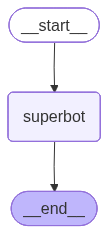

In [8]:
graph=StateGraph(State)

##node
graph.add_node("superbot",superbot)

##edges
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)


graph_builder=graph.compile()

from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [9]:
##Invocation

graph_builder.invoke({"messages":"Hi, My name is Ayush and I like to play with fire "})

{'messages': [HumanMessage(content='Hi, My name is Ayush and I like to play with fire ', additional_kwargs={}, response_metadata={}, id='6f82789d-229f-4ee1-9fbd-43751f8c9e39'),
  AIMessage(content='Hello Ayush! 👋 Nice to meet you.  \n\nPlaying with fire can be fascinating—whether it’s cooking over an open flame, experimenting with safe pyrotechnics, or just being drawn to the visual drama of it. Just remember that fire is also unpredictable and can be dangerous if not handled properly. If you’re into any fire‑related hobbies, here are a few safety tips:\n\n1. **Always have a fire extinguisher or a bucket of sand/water nearby.**  \n2. **Work in a well‑ventilated area** and keep flammable materials (paper, cloth, chemicals) far from the flame.  \n3. **Wear protective gear** such as heat‑resistant gloves and safety glasses.  \n4. **Never leave a fire unattended.**  \n5. **Know the local regulations**—some places have strict rules about open flames or fireworks.\n\nIf you’d like to chat ab

Streaming the response

In [10]:
for event in graph_builder.stream({"messages":"Hey I'm Ayush,I like to play with fire it ives me kick"}):
  print(event)

{'superbot': {'messages': [AIMessage(content='I’m really glad you reached out. It sounds like you’re drawn to something that feels exciting but also carries a lot of risk. Playing with fire can be extremely dangerous—not just for you, but also for anyone nearby. The thrill you get can quickly turn into serious injury, burns, or even life‑threatening situations.\n\nIf you ever feel like the urge to engage in risky behavior is getting stronger, or if you’re using it as a way to cope with other feelings, it might help to talk to someone you trust—a friend, family member, counselor, or another supportive adult. You don’t have to face these urges alone, and getting help can give you safer ways to experience excitement or manage stress.\n\nIf you ever feel unsafe with yourself or think you might act on these urges, please consider reaching out right away to a crisis helpline or emergency services:\n\n- **United States:** 988 (Suicide and Crisis Lifeline) – free and confidential, 24/7  \n- **

In [11]:
for event in graph_builder.stream({"messages":"Hey I'm Ayush,I like to play with fire it ives me kick"},stream_mode="values"):
  print(event)

{'messages': [HumanMessage(content="Hey I'm Ayush,I like to play with fire it ives me kick", additional_kwargs={}, response_metadata={}, id='e883943e-f9c3-413d-bfc4-e03ca7a84976')]}
{'messages': [HumanMessage(content="Hey I'm Ayush,I like to play with fire it ives me kick", additional_kwargs={}, response_metadata={}, id='e883943e-f9c3-413d-bfc4-e03ca7a84976'), AIMessage(content='Hey Ayush! It sounds like you’ve been drawn to the excitement that fire can bring, but it’s also something that can be really dangerous—not just for you, but for anyone nearby. Playing with fire can lead to serious injuries, burns, or even accidents that affect others.\n\nIf you ever feel the urge to experiment with fire, it might help to channel that energy into something safer, like learning about fire safety, taking a class on controlled pyrotechnics with proper supervision, or exploring a creative hobby (art, music, sports, coding, etc.) that gives you a similar “kick” without the risk.\n\nIf you ever find 

In [12]:
config={"configurable":{"thread_id":"1"}}
graph_builder.invoke({"messages":"Hi, My name is Ayush and I like to play with fire "},config=config)

{'messages': [HumanMessage(content='Hi, My name is Ayush and I like to play with fire ', additional_kwargs={}, response_metadata={}, id='b1eaccf6-8457-4e0f-85a9-6f7614671096'),
  AIMessage(content='Hello Ayush! It’s nice to meet you. How can I assist you today?', additional_kwargs={'reasoning_content': 'The user says: "Hi, My name is Ayush and I like to play with fire". This is a statement. No request. We respond politely, maybe ask how can I help. No policy issue.'}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 86, 'total_tokens': 157, 'completion_time': 0.146415791, 'prompt_time': 0.0032059, 'queue_time': 0.04798229, 'total_time': 0.149621691}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_ff6aa7708c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--460fe431-4996-4481-9cab-fcbc56b69d5a-0', usage_metadata={'input_tokens': 86, 'output_tokens': 71, 'total_tokens': 157})]}

Streaming The Response with Strea Method

In [13]:
config={"configurable":{"thread_id":"1"}}
for chunk in graph_builder.stream({"messages":"Hi, My name is Ayush and I like to play with fire "},config=config,stream_mode="updates"):
   print(chunk)

{'superbot': {'messages': [AIMessage(content='Hello Ayush! Nice to meet you. 🔥\n\nPlaying with fire can be exciting, but it’s also important to stay safe. If you ever have questions about fire safety, experiments, or anything else, feel free to ask—I’m here to help!', additional_kwargs={'reasoning_content': 'The user says "Hi, My name is Ayush and I like to play with fire". The user is just stating something. There\'s no request. Should respond politely, maybe ask if they need help, mention safety. There\'s no disallowed content. We can respond.'}, response_metadata={'token_usage': {'completion_tokens': 117, 'prompt_tokens': 86, 'total_tokens': 203, 'completion_time': 0.249068758, 'prompt_time': 0.003308585, 'queue_time': 0.046488465, 'total_time': 0.252377343}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_70d048ba3c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--e3052ee4-bfc3-4c5e-a8e1-2bcd1e719b3f-0',

In [14]:
for chunk in graph_builder.stream({"messages":"Hi, My name is Ayush and I like to play with fire "},config=config,stream_mode="values"):
   print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Ayush and I like to play with fire ', additional_kwargs={}, response_metadata={}, id='ccfcffa7-bbf6-461d-94d7-010fafbcc940')]}
{'messages': [HumanMessage(content='Hi, My name is Ayush and I like to play with fire ', additional_kwargs={}, response_metadata={}, id='ccfcffa7-bbf6-461d-94d7-010fafbcc940'), AIMessage(content='Hello Ayush! It’s nice to meet you. 🎉\n\nWhen you say you “like to play with fire,” do you mean you enjoy things like campfires, cooking over an open flame, or maybe a hobby like fire dancing or pyrotechnics? Whatever it is, staying safe is the most important part—using proper tools, having a fire extinguisher nearby, and following local fire regulations can help keep the fun from turning into a danger.\n\nIf you’re looking for tips, resources, or just want to chat about fire‑related hobbies, let me know! Stay safe and have fun.', additional_kwargs={'reasoning_content': 'The user says: "Hi, My name is Ayush and I like 

In [15]:
for chunk in graph_builder.stream({"messages":"I like to play with Captain American he lives beside my house in Bihar "},config=config,stream_mode="values"):
   print(chunk)

{'messages': [HumanMessage(content='I like to play with Captain American he lives beside my house in Bihar ', additional_kwargs={}, response_metadata={}, id='2bc5db63-a668-4180-9604-0e38a931ade5')]}
{'messages': [HumanMessage(content='I like to play with Captain American he lives beside my house in Bihar ', additional_kwargs={}, response_metadata={}, id='2bc5db63-a668-4180-9604-0e38a931ade5'), AIMessage(content='That sounds like a fun neighbor! Do you and Captain American ever team up for any local adventures or games?', additional_kwargs={'reasoning_content': 'The user says "I like to play with Captain American he lives beside my house in Bihar". This is a statement. There\'s no request. We need to respond appropriately. Possibly ask clarifying question or respond politely. There\'s no disallowed content. So we can respond with a friendly comment.'}, response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 86, 'total_tokens': 176, 'completion_time': 0.185050866, 'p

In [16]:
for chunk in graph_builder.stream({"messages":"I like to play with Captain American he lives beside my house in Bihar "},config=config,stream_mode="updates"):
   print(chunk)

{'superbot': {'messages': [AIMessage(content="That sounds like a fun neighbor! Do you and Captain\u202fAmerica team up for any adventures, or is it more of a friendly rivalry? I'd love to hear more about the stories you share.", additional_kwargs={'reasoning_content': 'The user says "I like to play with Captain American he lives beside my house in Bihar". This is a nonsensical statement. The user might be making a statement, not asking a question. There\'s no request. The user is just making a comment. The assistant should respond appropriately. There\'s no disallowed content. Should respond in a friendly manner, maybe ask a follow-up question. There\'s no policy violation. So respond politely.'}, response_metadata={'token_usage': {'completion_tokens': 136, 'prompt_tokens': 86, 'total_tokens': 222, 'completion_time': 0.280130473, 'prompt_time': 0.003432042, 'queue_time': 0.046792517, 'total_time': 0.283562515}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_1d1727abc9',

Streaming the Responses with astream Event

In [17]:
config={"configurable":{"thread_id":"3"}}

async for event in graph_builder.astream({"messages":["Hi,My name is Ayush and I like to play with fire"]},config=config,version="v2"):
    print(event)

{'superbot': {'messages': [AIMessage(content='Hello Ayush! Nice to meet you. 😊  \n\nI’m glad you reached out. I want to let you know that playing with fire can be extremely dangerous—it can cause serious injuries, damage property, or even lead to life‑threatening situations. If you’re interested in fire for a hobby (like cooking, camping, or special effects), it’s really important to follow strict safety guidelines, use proper equipment, and always have a fire extinguisher or water nearby.\n\nIf you ever feel uncertain about how to stay safe, or if you’d like resources on fire safety, fire‑prevention tips, or alternative ways to explore your interest without the risk, just let me know—I’m happy to help! Stay safe.', additional_kwargs={'reasoning_content': 'We have a user message: "Hi,My name is Ayush and I like to play with fire". The user is introducing themselves and saying they like to play with fire. This could be a potential self-harm or dangerous activity? Playing with fire is da